In [1]:
!git clone https://github.com/maahidg03/AuthenticationECG

fatal: destination path 'AuthenticationECG' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import imutils
import random
# from keras.applications import VGG19, VGG16
# from keras.applications.vgg19 import preprocess_input
# from keras.applications.vgg16 import preprocess_input
from itertools import permutations
from keras.optimizers import SGD,Adam
from PIL import Image
import keras
from keras import backend as K
from keras import Sequential, losses, optimizers, Input, optimizers
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate
from keras.models import Model, Sequential
from keras.layers import Flatten, Lambda, Dense, Conv2D, MaxPool2D, Average, Dropout, Activation
from keras.utils import to_categorical, plot_model,vis_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, EarlyStopping
from keras.preprocessing.image import img_to_array
from itertools import chain 
from skimage import io
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pywt
from scipy import signal
from scipy.spatial import distance

Using TensorFlow backend.


In [3]:
cd /content/AuthenticationECG


/content/AuthenticationECG


In [0]:
def load_data(number_of_items=3):
    """
        number_of_items -> Number of items to return
        returns the data in a dictionary of images and labels.
    """
    path = "ptbScalograms"
    path1= "ptbScalograms/Cropped"
    data = [] 
    curated_data = {"label":[], "scalogram":[]}
    for subject_name in os.listdir(path):
        if subject_name == ".DS_Store":
            number_of_items=number_of_items+1
            continue
        if subject_name  ==".ipynb_checkpoints":
            number_of_items=number_of_items+1
            continue
        print ("Going through subject:" + subject_name)
        base=os.path.basename(path+"/"+subject_name)
        labelData=os.path.splitext(base)[0]
        print(labelData)
        i=0
        for items in os.listdir(path+"/"+subject_name):
            if items == ".DS_Store":
                continue
            if items.endswith(".png"):
                try:
                    im2 = cv2.imread(path+"/"+subject_name+"/"+items)
                    crop_img = im2[30:20+235, 50:50+342]
                    im = cv2.resize(crop_img, (224,224)) # Changing into 80x80X3
                    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                    curated_data['scalogram'].append(im)
                    curated_data['label'].append(labelData)
                except:
                      df = None  

    return curated_data

## **Data Loading & Pre-processing**

In [5]:
data = load_data(number_of_items=300)

Going through subject:patient018
patient018
Going through subject:patient080
patient080
Going through subject:patient015
patient015
Going through subject:patient279
patient279
Going through subject:patient057
patient057
Going through subject:patient002
patient002
Going through subject:patient061
patient061
Going through subject:patient077
patient077
Going through subject:patient074
patient074
Going through subject:patient142
patient142
Going through subject:patient275
patient275
Going through subject:patient032
patient032
Going through subject:patient115
patient115
Going through subject:patient106
patient106
Going through subject:patient262
patient262
Going through subject:patient259
patient259
Going through subject:patient249
patient249
Going through subject:patient190
patient190
Going through subject:patient078
patient078
Going through subject:patient110
patient110
Going through subject:patient135
patient135
Going through subject:patient223
patient223
Going through subject:patient007

In [6]:
print(data['scalogram'][0].shape)
print(len(data['scalogram']))

(224, 224)
74552


In [7]:
len(data['label'])

74552

In [8]:
data_array=np.array(data['scalogram'])
labels=np.array(data['label'])
print("Data shape:{}".format(data_array.shape))
print("Labels shape:{}".format(labels.shape))

Data shape:(74552, 224, 224)
Labels shape:(74552,)


In [0]:
# data_array = data_array / 255.0

In [9]:
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)
print("Encoded Labels shape:{} value:{}".format(labels.shape,labels))

Encoded Labels shape:(74552,) value:[ 17  17  17 ... 144 144 144]


In [10]:
unique_labels=set(labels)
print(unique_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [0]:
x_train, x_test, y_train,  y_test=train_test_split(data_array, labels, test_size=0.2, random_state=2)


In [12]:
print("Shapes:")
print("Train Data:{}".format(x_train.shape))
print("Train Label:{}".format(y_train.shape))
print("Test Data:{}".format(x_test.shape))
print("Test Label:{}".format(y_test.shape))

Shapes:
Train Data:(59641, 224, 224)
Train Label:(59641,)
Test Data:(14911, 224, 224)
Test Label:(14911,)


In [13]:
x_train_master = np.expand_dims(x_train, 3)
x_test_master = np.expand_dims(x_test, 3)
print(x_train.shape, x_test.shape)

(59641, 224, 224) (14911, 224, 224)


In [14]:
y_train_master = y_train.flatten()
y_test_master = y_test.flatten()
print(y_train_master.shape,y_test_master.shape)

(59641,) (14911,)


In [15]:
shape=x_train.shape
dim_x = shape[1]
dim_y = shape[2]
print("Dimension of Scalogram Image: {}*{}".format(dim_x,dim_y ))

Dimension of Scalogram Image: 224*224


## **Triplets Generation & Visualization**

In [0]:
def generate_triplets(dataset, label, sample_per_class=20):
    x, y = None, None
    for i in set(label):
        pos_indices = np.argwhere(label == i)[:,0]
        neg_indices = np.argwhere(label != i)[:,0]

        # print("pos indices: {}, neg_indices: {}".format(pos_indices.shape, neg_indices.shape))
        choice_anchor = np.random.choice(pos_indices.shape[0], sample_per_class, replace=True)
        choice_anchor = pos_indices[choice_anchor]

        choice_pos = np.random.choice(pos_indices.shape[0], sample_per_class, replace=True)
        choice_pos = pos_indices[choice_pos]

        choice_neg = np.random.choice(neg_indices.shape[0], sample_per_class, replace=True)
        choice_neg = neg_indices[choice_neg]

        sub_x_anc = dataset[choice_anchor]

        sub_x_pos = dataset[choice_pos]

        sub_x_neg = dataset[choice_neg]


        if(x is None):
            x = [(sub_x_anc), (sub_x_pos), (sub_x_neg)]
            y = [label[choice_anchor], label[choice_pos], label[choice_neg]]
        else:
            x[0] = np.vstack((x[0], (sub_x_anc)))
            x[1] = np.vstack((x[1], (sub_x_pos)))
            x[2] = np.vstack((x[2], (sub_x_neg)))

            y[0] = np.hstack((y[0].flatten(), label[choice_anchor].flatten()))
            y[1] = np.hstack((y[1].flatten(), label[choice_pos].flatten()))
            y[2] = np.hstack((y[2].flatten(), label[choice_neg].flatten()))

    return x, y

In [0]:
num=150
num_train_per_class=int(num*.80)
num_test_per_class=int(num*.20)

In [0]:
train_x, train_y = generate_triplets(x_train_master, y_train_master, num_train_per_class)

In [0]:
test_x, test_y = generate_triplets(x_test_master, y_test_master,num_test_per_class)

In [20]:
print("Length of generated triplet for Train Data:{},{}".format(len(train_x),train_x[0].shape))
print("Length of generated triplet for Test Data:", len(test_x),test_x[0].shape)
print("Length of generated triplet for Train Label:{},{}".format(len(train_y),train_y[0].shape))
print("Length of generated triplet for Test Label:", len(test_y),test_y[0].shape)

Length of generated triplet for Train Data:3,(34560, 224, 224, 1)
Length of generated triplet for Test Data: 3 (8640, 224, 224, 1)
Length of generated triplet for Train Label:3,(34560,)
Length of generated triplet for Test Label: 3 (8640,)


In [0]:
def visualize_data(data, n):
    n = min(len(data[0]), n)
    random_choices = np.random.choice(len(data[0]),n, replace=False)
    fig, ax = plt.subplots(n, 3,figsize=(10,40))
    anc, pos, neg = data
    for i,ch in enumerate(random_choices):
        ax[i, 0].imshow(np.squeeze(anc[ch] ))
        ax[i, 1].imshow(np.squeeze(pos[ch] ))
        ax[i, 2].imshow(np.squeeze(neg[ch] ))


        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()
        ax[i, 2].set_axis_off()

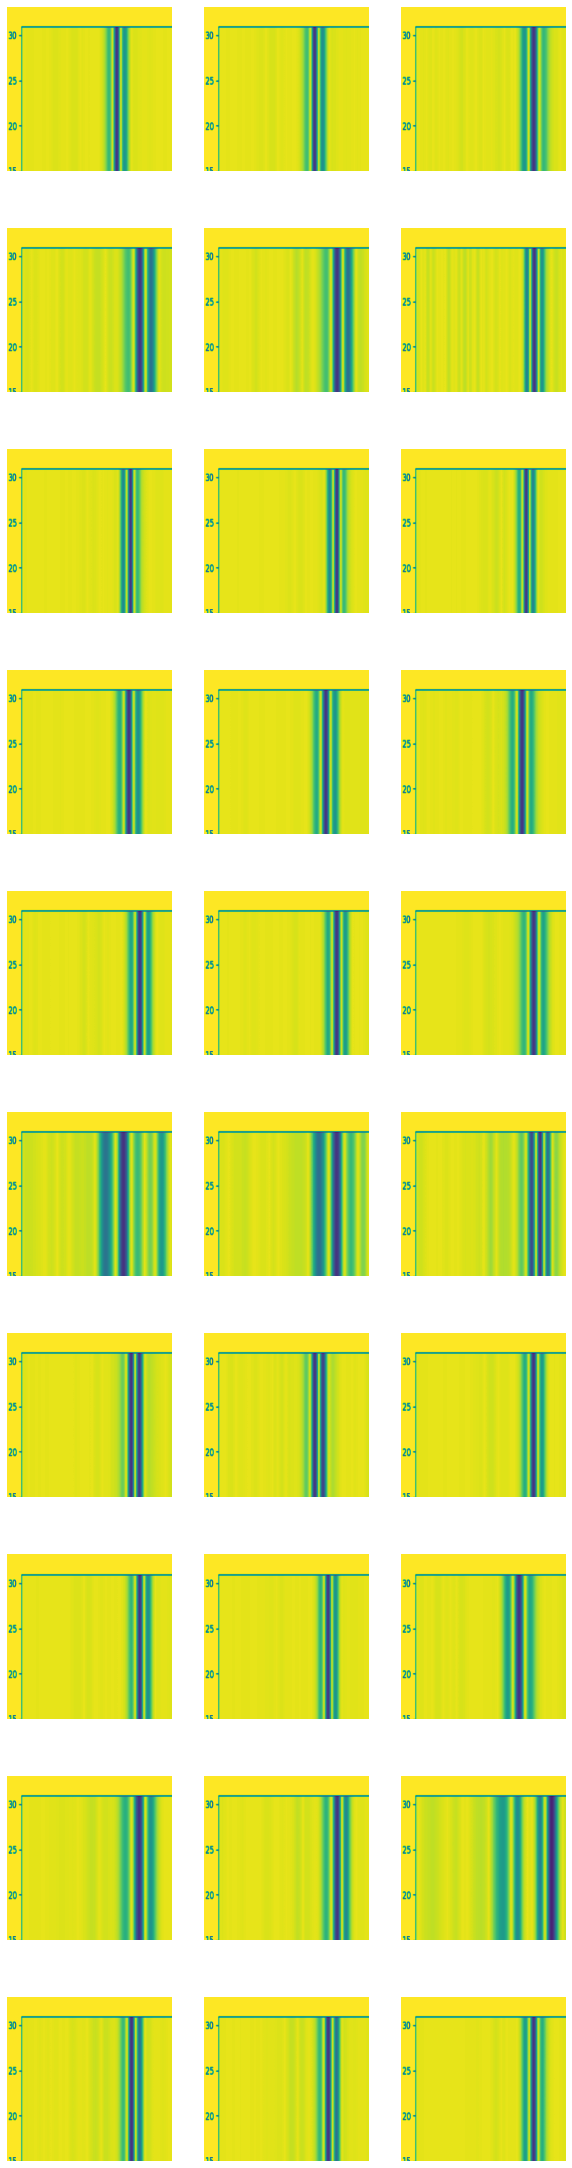

In [22]:
visualize_data(train_x, 10)

## **Cost Function: Triplet-Loss**

In [0]:
def triplet_loss(inputs, dist='euclidean', margin='maxplus'):
    print("loss calculation")
    alpha=1.3
    anchor, positive, negative = inputs
    positive_distance = K.square(anchor - positive)
    negative_distance = K.square(anchor - negative)
    if dist == 'euclidean':
        positive_distance = K.sqrt(K.sum(positive_distance, axis=-1, keepdims=True))
        negative_distance = K.sqrt(K.sum(negative_distance, axis=-1, keepdims=True))
    elif dist == 'sqeuclidean':
        positive_distance = K.sum(positive_distance, axis=-1, keepdims=True)
        negative_distance = K.sum(negative_distance, axis=-1, keepdims=True)
    loss = positive_distance - negative_distance
    if margin == 'maxplus':
        loss = K.maximum(0.0, alpha + loss)
    elif margin == 'softplus':
        loss = K.log(1 + K.exp(loss))
    return K.mean(loss)

## **Models for authentication**

In [0]:
def our_model(in_dims):
   model = Sequential()
   model.add(Conv2D(64, kernel_size=5, input_shape=(in_dims[0],in_dims[1],in_dims[2],), activation="relu"))
   model.add(MaxPool2D(pool_size=(2, 2)))
  #  model.add(Dropout(0.25))
   model.add(Conv2D(64, kernel_size=5, activation="relu"))
   model.add(MaxPool2D(pool_size=(2, 2)))
   model.add(Conv2D(128, kernel_size=5, activation="relu"))
   model.add(MaxPool2D(pool_size=(2, 2)))
   model.add(Conv2D(128, kernel_size=5, activation="relu"))
   model.add(MaxPool2D(pool_size=(2, 2)))
   model.add(Dropout(0.25)) 
   return model

In [0]:
from keras.models import load_model

def create_base_network(in_dims, embedding_dim):

    _input = Input(shape=in_dims)
    our_model_object=our_model(in_dims)
    output_ourModel = our_model_object(_input)

    x = Flatten()(output_ourModel)
    x = Dense(embedding_dim * 4,activation="relu")(x)
    x = Dense(embedding_dim * 2, activation='relu')(x)
    x = Dense(embedding_dim)(x)
    
    return Model(_input, x)

In [0]:
def network_model(input_shape, triplet_margin=.3, embedding_dim=50):

  anchor_input = Input((dim_x,dim_y,1, ), name='anchor_input')
  positive_input = Input((dim_x,dim_y,1, ), name='positive_input')
  negative_input = Input((dim_x,dim_y,1, ), name='negative_input')

  Shared_DNN=create_base_network(input_shape, embedding_dim)
  
  encoded_anchor = Shared_DNN(anchor_input)
  encoded_positive = Shared_DNN(positive_input)
  encoded_negative = Shared_DNN(negative_input)

  inputs=[anchor_input, positive_input, negative_input]
  outputs=[encoded_anchor, encoded_positive, encoded_negative]

  triplet=Model(inputs=inputs, outputs=outputs)
  triplet.add_loss((triplet_loss(outputs, dist='euclidean', margin='maxplus'))) 

  return Shared_DNN, triplet



In [27]:
#print(dim_x)
Shared_DNN, triplet= network_model((dim_x,dim_y,1), triplet_margin=.3, embedding_dim=150)

loss calculation


In [28]:
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.RMSprop(),metrics=['accuracy'])
triplet.compile(loss=None, optimizer=optimizers.RMSprop(lr=0.0001))
triplet.summary()
# Adam(0.0001)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor_input (InputLayer)       (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
positive_input (InputLayer)     (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
negative_input (InputLayer)     (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 150)          8624834     anchor_input[0][0]               
                                                                 positive_input[0][0]       

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output model_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_1.
  'be expecting any data to be passed to {0}.'.format(name))


In [0]:
tensorboard = TensorBoard()
earlystopping = EarlyStopping(patience=3)

In [30]:
## Training
n_epochs=100
#my_model.fit(features_train, labels_train, epochs=100, batch_size=16, callbacks=[tensorboard,earlystopping], validation_data=(features_test, labels_test))
history = triplet.fit(train_x, shuffle=True, batch_size=32, validation_split=.2, callbacks=[tensorboard,earlystopping], epochs=n_epochs)

Train on 27648 samples, validate on 6912 samples
Epoch 1/100
27648/27648 [==============================] - 573s 21ms/step - loss: 0.6503 - val_loss: 0.3094
Epoch 2/100
27648/27648 [==============================] - 561s 20ms/step - loss: 0.3355 - val_loss: 0.1668
Epoch 3/100
27648/27648 [==============================] - 561s 20ms/step - loss: 0.2527 - val_loss: 0.1691
Epoch 4/100
27648/27648 [==============================] - 561s 20ms/step - loss: 0.2070 - val_loss: 0.1921
Epoch 5/100
27648/27648 [==============================] - 562s 20ms/step - loss: 0.1825 - val_loss: 0.1621
Epoch 6/100
27648/27648 [==============================] - 561s 20ms/step - loss: 0.1559 - val_loss: 0.1471
Epoch 7/100
27648/27648 [==============================] - 562s 20ms/step - loss: 0.1380 - val_loss: 0.1484
Epoch 8/100
27648/27648 [==============================] - 562s 20ms/step - loss: 0.1190 - val_loss: 0.1585
Epoch 9/100
27648/27648 [==============================] - 562s 20ms/step - loss: 0.112

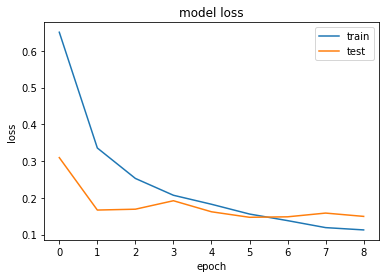

In [31]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
triplet.save("PTBTripletLossPTBh5") #

## **Get the Encoding/Embedding Value for Train data(Anchor, Positive, Negative)**

In [0]:
train_anchor_embeds=Shared_DNN.predict(train_x[0])

In [0]:
train_positive_embeds=Shared_DNN.predict(train_x[1])

In [0]:
train_negative_embeds=Shared_DNN.predict(train_x[2])

In [36]:
print("Shape of Embeddings for Train(Anchor) data:{}".format(train_anchor_embeds.shape))
print("Shape of Embeddings for Train(positive) data:{}".format(train_positive_embeds.shape))
print("Shape of Embeddings for Train(negative) data:{}".format(train_negative_embeds.shape))

Shape of Embeddings for Train(Anchor) data:(34560, 150)
Shape of Embeddings for Train(positive) data:(34560, 150)
Shape of Embeddings for Train(negative) data:(34560, 150)


### **Get value of k templates for each label using trained data**

In [0]:
# Get the embeddings of the images
def get_image_embedding(test_model, input): 
  train_embeds = test_model.predict(input)
  return train_embeds

In [38]:
train_embeds=get_image_embedding(Shared_DNN, train_x[0])
print("Train Embeddings shape:{}".format(train_embeds.shape))
#print(train_embeds[0], train_embeds[1])

Train Embeddings shape:(34560, 150)


In [0]:
train_data_v_stack = np.vstack((train_x[0], train_x[1], train_x[2]))

In [0]:
train_label_v_stack = np.vstack((train_y[0], train_y[1], train_y[2]))

In [41]:
print("Shape of vertical_stacked train data: {}".format(train_data_v_stack.shape))
print("Shape of vertical_stacked train label in form of [[],[],[]]: {}".format(train_label_v_stack.shape))
print("Labels of Anchor Image:{}".format(train_label_v_stack[0]))

Shape of vertical_stacked train data: (103680, 224, 224, 1)
Shape of vertical_stacked train label in form of [[],[],[]]: (3, 34560)
Labels of Anchor Image:[  0   0   0 ... 287 287 287]


In [42]:
print(train_y[1].shape)

(34560,)


### **Calculating Threshold using Trained Data**

In [43]:
map_threshold_calc={}
for unique_label in unique_labels:
  # print(unique_label)
  target_label=np.argwhere(train_label_v_stack[1]==unique_label)
  # List of list format,So need to change into single list using chain
  target_label = list(chain.from_iterable(target_label)) 
  print("Traget label:", target_label)
  start_index=target_label[0]
  end_index=target_label[-1]
  # Data stored of Positive Image value for threshold calculation
  data_per_label_threshold=train_positive_embeds[start_index:end_index+1]
  map_threshold_calc[unique_label]=data_per_label_threshold
  # print(map_threshold_calc[unique_label].shape)

Traget label: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
Traget label: [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 

In [0]:
m1=0.6
m2=0.6

In [46]:
map_threshold_value={}
for key in map_threshold_calc.keys():
  data=map_threshold_calc[key]
  # print(data)
  dists = distance.cdist(data, data, 'euclidean')
  print(dists.shape)
  average_calc=[]
  for dist in dists:
    mean=np.mean(dist)
    standard_deviation=np.std(dist)   
    dist_mean=abs(dist-mean)
    # print(dist>dist_mean-0.6*standard_deviation)
    # print(dist<dist_mean+0.6*standard_deviation)
    soln_array=dist>dist_mean-m1*standard_deviation
    soln_array=dist[soln_array] 
    soln_array=dist<dist_mean+m2*standard_deviation
    soln_array1=dist[soln_array] 
    maximum=max(soln_array1)
    average_calc.append(maximum)
  threshold_for_label = sum(average_calc)/len(average_calc)
  print("Threshold for Label {}:{}".format(key, threshold_for_label))
  map_threshold_value[key]=threshold_for_label

(120, 120)
Threshold for Label 0:2.807835982481853
(120, 120)
Threshold for Label 1:2.871159683112148
(120, 120)
Threshold for Label 2:2.21963048874016
(120, 120)
Threshold for Label 3:2.809415670135093
(120, 120)
Threshold for Label 4:3.5800868259914904
(120, 120)
Threshold for Label 5:3.193022376671927
(120, 120)
Threshold for Label 6:3.3521977402606997
(120, 120)
Threshold for Label 7:2.85987798326133
(120, 120)
Threshold for Label 8:2.641133979182734
(120, 120)
Threshold for Label 9:3.1422554778264575
(120, 120)
Threshold for Label 10:3.576583925373738
(120, 120)
Threshold for Label 11:2.739327034048521
(120, 120)
Threshold for Label 12:2.9285540678224904
(120, 120)
Threshold for Label 13:3.022357400297799
(120, 120)
Threshold for Label 14:3.5031611403888587
(120, 120)
Threshold for Label 15:3.1920124453183565
(120, 120)
Threshold for Label 16:2.924401543906804
(120, 120)
Threshold for Label 17:3.090937126421138
(120, 120)
Threshold for Label 18:3.160541708845086
(120, 120)
Thresho

## **Brute-Force Testing**

In [48]:
print("What is your claimed identity?")
claimed_label=input()
print(claimed_label)

What is your claimed identity?
7
7


In [0]:
def get_k_template_values(label):
  label=int(label)
  target_label=np.argwhere(train_label_v_stack[0]==label)
  # List of list format.So need to change into single list using chain
  target_label = list(chain.from_iterable(target_label)) 
  #print(target_label)

  k_template_value=[]
  for value in target_label:
    k_template_value.append(train_embeds[value])
  #print("K templates, Value of k:{}, template shape:{}".format(len(k_template_value), len(k_template_value[0])))
  return k_template_value

In [0]:
k_template_value=get_k_template_values(claimed_label)

In [50]:
test_data_v_stack=np.vstack((test_x[0], test_x[1], test_x[2]))
test_label_v_stack=np.vstack((test_y[0], test_y[1], test_y[2]))
print("Shape of vertical_stacked test data: {}".format(test_data_v_stack.shape))
print("Shape of vertical_stacked test label in form of [[],[],[]]: {}".format(test_label_v_stack.shape))
print("Labels of Image to test:{}".format(test_label_v_stack[0]))

Shape of vertical_stacked test data: (25920, 224, 224, 1)
Shape of vertical_stacked test label in form of [[],[],[]]: (3, 8640)
Labels of Image to test:[  0   0   0 ... 287 287 287]


In [51]:
print("Select any label!")
print(set(test_label_v_stack[0]))
real_identity = input()
print("Input Value:", real_identity)


# claimed_identity = 2

Select any label!
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

In [52]:
# test_label=np.argwhere(test_label_v_stack[0]==2)
test_label=np.argwhere(test_label_v_stack[0]==int(real_identity))
test_label = list(chain.from_iterable(test_label)) 
# Multiple values of the same label in test_data, so we will select any random one
print(test_label)
# print(random_test_label)

[180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209]


In [53]:
# test_segment=None
random_test_label=test_label[0]
random_test_data=(test_data_v_stack[random_test_label]).reshape(1,224,224,1)
print("Corresponding image shape:", random_test_data.shape)
test_embeds = Shared_DNN.predict(random_test_data)
print("Shape of test template:{}".format(test_embeds.shape))
test_segment=test_embeds

Corresponding image shape: (1, 224, 224, 1)
Shape of test template:(1, 150)


In [0]:
def similar_score(test_template, stored_templates):
  dists = distance.cdist(test_template, stored_templates, 'euclidean')
  soln=min(dists[0])
  return soln

In [55]:
score=similar_score(test_segment, k_template_value)
print(score)

7.18684713439558


In [56]:
threshold=map_threshold_value[int(claimed_label)]
print(threshold)
if score>threshold:
  print("You are not authenticated with dissimarity score:{}".format(score))
else:
  print("Authentication Successful! with dissimarity score:{}".format(score))
    

2.85987798326133
You are not authenticated with dissimarity score:7.18684713439558


### **Authentication Model**

In [0]:

def authentication(test_segment,claimed_label):
  k_template_value=get_k_template_values(claimed_label)
  test_embeds = Shared_DNN.predict(test_segment)
  score=similar_score(test_embeds, k_template_value)
  threshold=map_threshold_value[int(claimed_label)]
  #print(threshold)
  if score>threshold:
    #print("You are not authenticated with dissimarity score:{}".format(score))
    return 'false'
  else:
    #print("Authentication Successful! with dissimarity score:{}".format(score))
    return 'true'
    


In [58]:
test_segment=test_x[0][0].reshape(1,224,224,1)
test_segment.shape

(1, 224, 224, 1)

### **Model Evaluation**

In [0]:
all_test_embeds=Shared_DNN.predict(test_x[0])

In [0]:
t_pos=0
f_neg=0
def countMetricsTruePositives():
  true_positives=0
  total=len(all_test_embeds)
  for i in range(len(all_test_embeds)):
    test_embed=all_test_embeds[i]
    claimed_label=test_y[0][i]
    test_segment=test_x[0][i].reshape(1,224,224,1)
    response=authentication(test_segment,claimed_label)
    if response == "true":
      true_positives=true_positives+1
  t_pos=true_positives
  print("True Positives:" ,true_positives)
  f_neg=total-true_positives
  print("False Negatives:" ,f_neg)
  return t_pos,f_neg

In [61]:
t_pos,f_neg=countMetricsTruePositives()

True Positives: 7989
False Negatives: 651


In [62]:
print(test_y[2][1])

6


In [0]:
#with anchor-negative
t_neg=0
f_pos=0
def countMetricsTrueNegatives():
  true_negatives=0
  total=len(all_test_embeds)
  for i in range(len(all_test_embeds)):
    test_embed=all_test_embeds[i]
    claimed_label=test_y[2][i]
    test_segment=test_x[0][i].reshape(1,224,224,1)
    response=authentication(test_segment,claimed_label)
    if response == "false":
      true_negatives=true_negatives+1
  t_neg=true_negatives
  print("True Negative:" ,true_negatives)
  f_pos=total-true_negatives
  print("False Positive:" ,f_pos)
  return t_neg,f_pos

In [64]:
t_neg,f_pos=countMetricsTrueNegatives()

True Negative: 8528
False Positive: 112


In [66]:
#TP+TN/TP+TN+FN x 100%
total_cases=t_pos+f_neg+t_neg+f_pos
#print(total_cases)
numerator=t_pos+t_neg
accuracy=numerator/total_cases
accuracy=accuracy*100
print("Accuracy is: {}%".format(accuracy))

Accuracy is: 95.58449074074075%


In [0]:
#i+1 label
def countMetricsTrueNegative():
  t_neg=0
  f_pos=0
  n=int(num_test_per_class)
  second_n=n
  something=int(len(all_test_embeds)-1-n)
  true_negatives=0
  total=len(all_test_embeds)
  for i in range(len(all_test_embeds)):
    test_embed=all_test_embeds[i]
    #if i == 0:
      #claimed_label=int(test_y[0][-n:-n+1]) #this is correct
      #claimed_label=int(test_y[0][-1:])
    if(i >= something):
      claimed_label=test_y[0][0]
    else:
      claimed_label=int(test_y[0][n+i:n+i+1])
    #print("3 : ",i," and ",claimed_label)
    test_segment=test_x[0][i].reshape(1,224,224,1)
    response=authentication(test_segment,claimed_label)
    if response == "false":
      #print("Rejected i: ",i," label: ",int(test_y[0][n+i:n+i+1]))
      true_negatives=true_negatives+1
  t_neg=true_negatives
  print("True Negatives:" ,t_neg)
  f_pos=total-true_negatives
  print("False Positives:" ,f_pos)
  return t_neg,f_pos

In [68]:
t_neg1,f_pos1=countMetricsTrueNegative()

True Negatives: 8539
False Positives: 101


In [69]:
#TP+TN/TP+TN+FN x 100%
total_cases=t_pos+f_neg+t_neg1+f_pos1
#print(total_cases)
numerator=t_pos+t_neg1
accuracy=numerator/total_cases
accuracy=accuracy*100
print("Accuracy is: {}%".format(accuracy))

Accuracy is: 95.64814814814815%


In [70]:
print("Accuracy is: {}%".format(accuracy))
print("True Positives:{}".format(t_pos))
print("True Negatives:{}".format(t_neg1))
print("False Positive:{}".format(f_pos1))
print("False Negative:{}".format(f_neg))

Accuracy is: 95.64814814814815%
True Positives:7989
True Negatives:8539
False Positive:101
False Negative:651


In [72]:
false_acceptance = f_pos1/(f_pos1+t_neg1)
false_rejection = f_neg/(t_pos+f_neg)
print("FAR:{}".format(false_acceptance))
print("FRR:{}".format(false_rejection))
print("Average of FAR & FRR:{}".format((float(false_acceptance)+float(false_rejection))*50))

FAR:0.011689814814814814
FRR:0.07534722222222222
Average of FAR & FRR:4.351851851851852


In [73]:
t_neg1=0
f_pos1=0
n=int(num_test_per_class)
#--every image with every label

def countMetricsTrueNegatives1():
  true_negatives=0
  count=0
  #total=int(len(all_test_embeds)*47)
  count=0
  for i in range(len(all_test_embeds)):
    test_embed=all_test_embeds[i]
    test_segment=test_x[0][i].reshape(1,224,224,1)
    #print(n)
    for j in range(1,len(test_y[0]),n):
      count=count+1
      if test_y[0][i] == test_y[0][j]:
        continue
      else:
        claimed_label=int(test_y[0][j:j+1])
        response=authentication(test_segment,claimed_label)
        if response == "false":
          true_negatives=true_negatives+1
        else:
          print("image at index i: ",i," authenticated with : ",claimed_label," gives false positive")
  t_neg=true_negatives
  print("True Negatives:" ,t_neg)
  f_pos=count-true_negatives
  print("False Positives:" ,f_pos)      
  return t_neg,f_pos

t_neg,f_pos=countMetricsTrueNegatives1()

Streaming output truncated to the last 5000 lines.
image at index i:  6637  authenticated with :  160  gives false positive
image at index i:  6637  authenticated with :  162  gives false positive
image at index i:  6637  authenticated with :  169  gives false positive
image at index i:  6637  authenticated with :  170  gives false positive
image at index i:  6637  authenticated with :  177  gives false positive
image at index i:  6637  authenticated with :  181  gives false positive
image at index i:  6637  authenticated with :  190  gives false positive
image at index i:  6637  authenticated with :  195  gives false positive
image at index i:  6637  authenticated with :  214  gives false positive
image at index i:  6637  authenticated with :  238  gives false positive
image at index i:  6637  authenticated with :  246  gives false positive
image at index i:  6637  authenticated with :  253  gives false positive
image at index i:  6637  authenticated with :  256  gives false positive


In [77]:
#TP+TN/TP+TN+FN x 100%
total_cases=t_pos+f_neg+t_neg+f_pos
numerator=t_pos+t_neg
accuracy=numerator/total_cases
accuracy=accuracy*100
print("Accuracy is: {}%".format(accuracy))

Accuracy is: 98.85516788414712%


In [79]:
false_acceptance = f_pos/(f_pos+t_neg)
false_rejection = f_neg/(t_pos+f_neg)
print("FAR:{}".format(false_acceptance))
print("FRR:{}".format(false_rejection))
print("Average of FAR & FRR:{}".format((float(false_acceptance)+float(false_rejection))*50))

FAR:0.011226449974279835
FRR:0.07534722222222222
Average of FAR & FRR:4.328683609825103
